# 목차
## Part 1. 노드 필수 문제 풀이(3문제)
1. 월별 매출액 구하기
2. 가장 인기있는 음식/음료 구하기
3. 가장 많이 팔린 입장권 종류 구하기

## Part 2. 조별 프로젝트_추가 분석 주제 선정 및 분석 진행
분석 주제: 그동안 숨겨져 있던 모두카페의 진상 카공족은 누구일까?

## Part 1. 노드 필수 문제 풀이(3문제)

##### 라이브러리 불러오기

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

##### 데이터 불러오기

In [123]:
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

### 1. 월별 매출액 구하기 
월별 매출액 추세를 집계하고 그 결과를 시각화하기   
sales_data, groupby() 함수 사용

##### step 1_활용할 데이터(sales_data)를 temp_var로 정의하기    
##### step 2_temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당

In [124]:
temp_var = sales_data


temp_var['date'] = sales_data['결제일시'].str[:7]
# sales_data['date'] = sales_data['Time_stamp'].str[:7] 이거 보고 응용
temp_var

# sales_data.info()
# date 열 만들고 월별까지의 데이터를 저장하는 건 완료

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


##### step 3_sales_data의 결제금액에 포함된 쉼표(,) 지우기

In [125]:
# temp_var

# temp_var['결제금액'] = temp_var['결제금액'].str.strip() # 이 친구는 공백을 없애는 친구라 함
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',','')
temp_var
# temp_var.info()


# 그런데 여기에서 비고의 결제취소와 판매취소를 빼야할까
# 라고 생각했지만 그럼 -인 금액이 빠지지 않으므로 안된다는 걸 조원들과 이야기하며 알게됨
# temp_var = sales_data[sales_data['비고']=='결제완료']
# temp_var
# +,-쌍으로 뺄 수 있는 방법은 찾아보기

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02


##### step 4_sales_data의 결제금액을 숫자형태로 바꾸기

In [126]:
temp_var['결제금액'] = temp_var['결제금액'].astype('int64')
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int64 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int64(2), object(7)
memory usage: 499.7+ KB


##### step 5_temp_var의 payment열을 date 기준으로 집계하기

In [127]:
payment_data = temp_var['결제금액'].groupby(temp_var['date']).sum()
payment_data
# 처음에 count()를 해야한다고 생각했는데 sum()이었다. 이것도 조원들과 이야기하며 바로잡음

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

##### step 6_집계 결과를 시각화하기

In [128]:
# 필수문제 2에서 나온 한글이 포함된 시각화를 위해 Matplotlib 설정 가지고 오기

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


##### 막대그래프 1

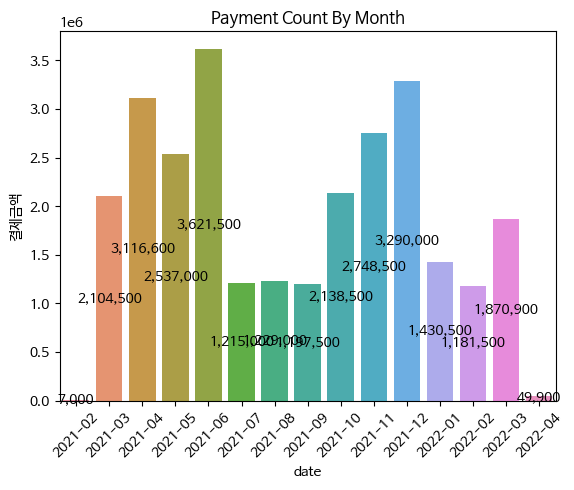

In [129]:
ax = sns.barplot(data=payment_data.reset_index(), x='date', y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Count By Month')
plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.show()

##### 막대그래프 2_x축, y축 바꿔서 차트 눕혀보기

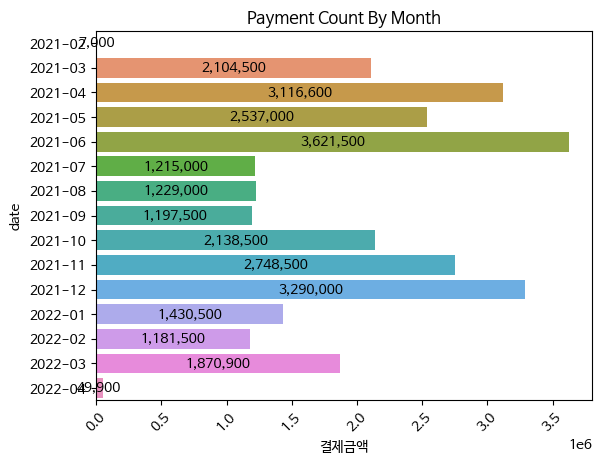

In [130]:
ax = sns.barplot(data=payment_data.reset_index(), x='결제금액', y='date')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Count By Month')
plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.show()

### 2. 가장 인기있는 음식/음료 구하기 
여러 메뉴들(음식, 음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화    
sales_data, value_counts 이용

##### step 1-1_상품명별 판매수량 데이터프레임 만들기

In [131]:
# temp_var의 상품명을 value_counts를 이용해 집계하기

# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
# temp_var


# step 1-1_판매수량 컬럼 값이 -1인 데이터 제외하고 집계하기
temp_var = temp_var[temp_var['판매수량']!=-1]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7097,2021-02-17 13:48,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7098,2021-02-17 13:50,선불기2,카페모카(HOT),현금,결제완료,1,4500,NaN,2021-02
7099,2021-02-17 13:46,카운터,아메리카노(HOT),현금,결제완료,1,3500,NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02


##### step 1-2_판매수량 컬럼 값이 -1인 데이터 제외하고 집계하기

In [132]:
value_counts = temp_var['상품명'].value_counts()
value_counts

김치볶음밥          1204
라면              749
짜장라면            455
치즈불고기볶음밥        420
계란추가            314
               ... 
라면(계란/치즈추가)       1
녹차(HOT)           1
짜장라면(계란추가)        1
이어폰(커널형)          1
오늘은 한돈간장불고기       1
Name: 상품명, Length: 100, dtype: int64

##### step 2_집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기

In [133]:
# temp_var['상품명'].info()
# 이렇게 하니까 AttributeError: 'Series' object has no attribute 'info' 에러남

# value_counts.info()
# 이번에는 이렇게 하니까 AttributeError: 'Series' object has no attribute 'info' 에러남
# 그래서 시리즈를 데이터프레임으로 만드는 방법을 찾아보다 아래와 같이 해봄

items_count = pd.DataFrame({'상품명': value_counts.index, '판매수량': value_counts.values})
items_count

,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
...,...,...
95,라면(계란/치즈추가),1
96,녹차(HOT),1
97,짜장라면(계란추가),1
98,이어폰(커널형),1


In [134]:
# 상위 10개 행만 보기
items_count.head(10)

,상품명,판매수량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


##### step 3_상품명별 결제금액 데이터프레임 만들기

In [135]:
# 앞에서 판매수량이 -1인 값들을 제외한 데이터프레임을 불러와
# 여기에서 상품명과 결제금액만 따로 데이터프레임을 만들기
# temp_var 

items_payment = temp_var[['상품명', '결제금액']] # 4-2 노드 보고 앎
# items_payment


# 이렇게 되면 6945행이 보이는데 중복되는게 보여서 걸러주어야 함
items_payment = items_payment.drop_duplicates(subset=['상품명']) # 중복되는거 걸러주기, 판다스 공식문서 봄
items_payment
# 이렇게 하면 중복되지 않는 100개의 행이 보임

,상품명,결제금액
0,치킨카라아케 6pc,4500
1,짜장라면(계란추가),5500
2,라면,4000
3,비엔나소세지(토핑),1000
4,라면(계란/치즈추가),5000
...,...,...
3837,유자에이드,4500
4037,카라멜마끼아또(ICE),5000
5641,이어폰(커널형),3000
5651,2인짜장라면,500


##### step 4_상품명별 판매수량 데이터 프레임 + 상품명별 결제금액 데이터 프레임 합치기

In [136]:
items_count_payment = pd.merge(items_count, items_payment) 
items_count_payment 
# 위에서 데이터프레임을 출력하는 명령어가 살아있으면 계속 전의 출력 명령어대로 보일 때가 있다. 
# 아까 drop 했는데 계속 drop 전에 입력한 출력값이 보였듯이.. drop 다음에 새로 출력문을 써주었는데도...
# 대애박 신기

,상품명,판매수량,결제금액
0,김치볶음밥,1204,5900
1,라면,749,4000
2,짜장라면,455,4500
3,치즈불고기볶음밥,420,6400
4,계란추가,314,500
...,...,...,...
95,라면(계란/치즈추가),1,5000
96,녹차(HOT),1,4000
97,짜장라면(계란추가),1,5500
98,이어폰(커널형),1,3000


##### step 5_판매수량 * 결제금액 새로운 열을 만들기

In [137]:
items_count_payment['총 판매액'] = (items_count_payment['판매수량'] * items_count_payment['결제금액'])
items_count_payment

,상품명,판매수량,결제금액,총 판매액
0,김치볶음밥,1204,5900,7103600
1,라면,749,4000,2996000
2,짜장라면,455,4500,2047500
3,치즈불고기볶음밥,420,6400,2688000
4,계란추가,314,500,157000
...,...,...,...,...
95,라면(계란/치즈추가),1,5000,5000
96,녹차(HOT),1,4000,4000
97,짜장라면(계란추가),1,5500,5500
98,이어폰(커널형),1,3000,3000


##### step 6_상품명으로 인덱스를 설정하고 내림차순으로 정렬 

In [138]:
items_count_payment.set_index('상품명')
items_count_payment = items_count_payment.sort_values(by=['총 판매액'], ascending=False) 
items_count_payment

,상품명,판매수량,결제금액,총 판매액
0,김치볶음밥,1204,5900,7103600
1,라면,749,4000,2996000
3,치즈불고기볶음밥,420,6400,2688000
2,짜장라면,455,4500,2047500
5,낙지볶음밥,312,6400,1996800
...,...,...,...,...
89,(밥)계란후라이 추가,3,1000,3000
87,비엔나소세지(토핑),3,1000,3000
98,이어폰(커널형),1,3000,3000
84,(밥)체다치즈추가,4,500,2000


##### step 7_상위 10개 행까지 추출

In [139]:
items_count_payment = items_count_payment.iloc[:10] 
items_count_payment

,상품명,판매수량,결제금액,총 판매액
0,김치볶음밥,1204,5900,7103600
1,라면,749,4000,2996000
3,치즈불고기볶음밥,420,6400,2688000
2,짜장라면,455,4500,2047500
5,낙지볶음밥,312,6400,1996800
6,새우볶음밥,309,5900,1823100
8,치즈감자튀김,246,5900,1451400
7,아메리카노(ICE),284,4400,1249600
9,감자튀김,242,4900,1185800
13,만두라면,139,5000,695000


##### step 8_index 재정렬 해주기

In [140]:
items_count_payment= items_count_payment.reset_index(drop=True)
items_count_payment

,상품명,판매수량,결제금액,총 판매액
0,김치볶음밥,1204,5900,7103600
1,라면,749,4000,2996000
2,치즈불고기볶음밥,420,6400,2688000
3,짜장라면,455,4500,2047500
4,낙지볶음밥,312,6400,1996800
5,새우볶음밥,309,5900,1823100
6,치즈감자튀김,246,5900,1451400
7,아메리카노(ICE),284,4400,1249600
8,감자튀김,242,4900,1185800
9,만두라면,139,5000,695000


##### step 9_시각화

In [141]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


##### 막대그래프1

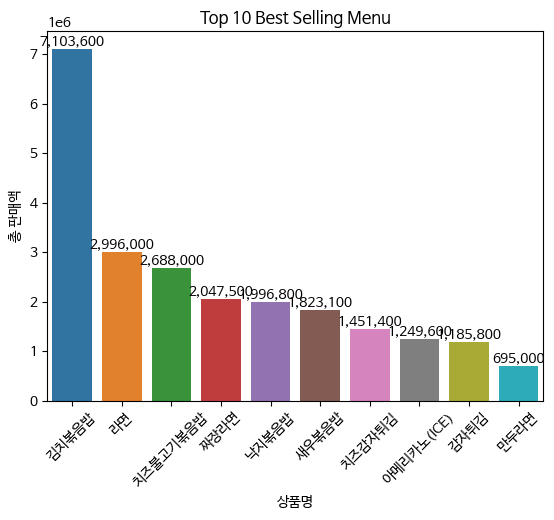

In [142]:
ax = sns.barplot(data=items_count_payment.reset_index(), x='상품명', y='총 판매액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('Top 10 Best Selling Menu')
plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.show()

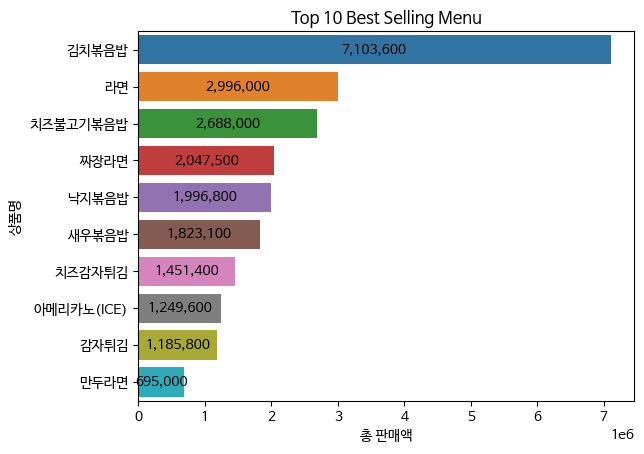

In [143]:
ax = sns.barplot(data=items_count_payment.reset_index(), x='총 판매액', y='상품명')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Top 10 Best Selling Menu')
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.show()


# 예이! 이제 제대로 된다!!!

### 3. 가장 많이 팔린 입장권 종류 구하기 
여러 입장권 종류를 판매 매출(판매 개수 * 금액) 순으로 정렬하고, 상위 10개를 뽑아 결과를 시각화    
value_counts 이용

##### step 1_활용할 데이터(entry_data)를 temp_var로 정의하기

##### step 2_temp_var의 금액을 숫자형태로 변환하기

In [144]:
temp_var = entry_data
# temp_var

# 음.. 이미 바뀌어 있는데요?
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


##### step 3_temp_var의 금액을 요금제명을 기준으로 집계하기

In [145]:
# 집계할 때 그룹바이가 아닌 다른걸 사용해도 되는 건가?
# 요금제명으로 정렬
# temp_var = temp_var.sort_values(by=['요금제명'], ascending=False)
# temp_var

# 요금제가 같은데에도 지불한 금액이 다르다..
# 그룹바이가 더 효과적일거 같음



tickets = temp_var.groupby(temp_var['요금제명']).sum().sort_values(by=['금액'], ascending=False)
# tickets
# 위의 sort_values는 안 써도 되는 것 같다

tickets_1 = tickets.head(10)
tickets_1

,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


##### step 4_시각화

##### 막대그래프 1

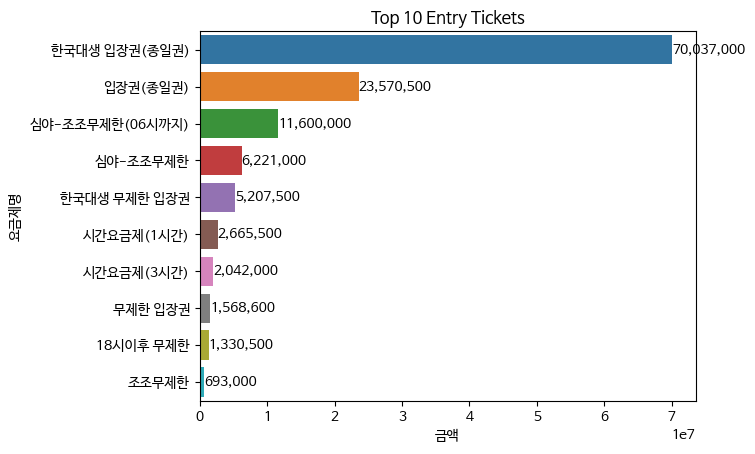

In [146]:
ax = sns.barplot(data=tickets_1.reset_index(), x='금액', y='요금제명')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues]) 
# 금액 표시 단위 바꾸기 공부하기
#label_type='center' 안 쓰니 막대 오른쪽에 써진다 좋다
plt.title('Top 10 Entry Tickets')
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.show()

##### 막대그래프 2

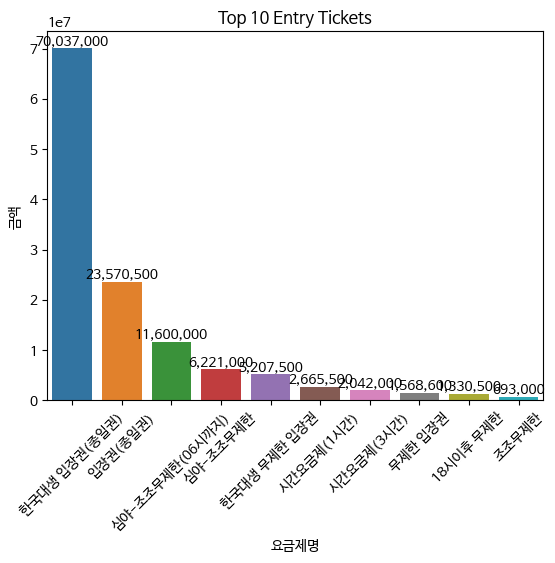

In [147]:
# 위에서 head(10)에서만 끝나지 말고 새 변수로 정의해주기 -> tickets_1
ax = sns.barplot(data=tickets_1.reset_index(), x='요금제명', y='금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('Top 10 Entry Tickets')
plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.show()

## Part 2. 조별 프로젝트_추가 분석 주제 선정 및 분석 진행

### 분석 주제: 그동안 숨겨져 있던 모두카페의 진상 카공족은 누구일까? 
#### 가설: 누적 이용시간이 긴 고객들은 음식/음료의 결제금액도 많을 것이다.
#### 포카리스웨트(1조)    
노근아, 장지예, 한성덕
#### 사용한 데이터    
entry_data, sales_data

### 포카리스웨트 분석 flow
1. 고객별 이용시간 합계 데이터프레임 만들기(step 1 - 5)
2. 고객별 결제금액 합계 데이터프레임 만들기(step 6 - 8)
3. 두 데이터프레임 합치기(step 9)
4. 시각화(step 10, 11)

##### step 1_고객별 이용시간 합계 데이터프레임 만들기 

In [148]:
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [149]:
# 구하려고 봤더니.. 문제 1 발생!
temp_var.head(10)
# 완전히 똑같은 중복데이터가 보임
# 가설 1. 중복데이터가 생기는 이유는 한 사람이 오래 있으면서 왔다갔다 해서?
# 가설 2. 한 사람 아이디로 친구들꺼 찍어주는거 아닐까!
# 추측 -> 포인트적립하나...? 한 사람이 몰아서 적립, 시스템상 한 고객 아이디로 동시에 입실이 가능한가봅니다..


# 또 문제 2 발생!
temp_var.tail(10) 
# tail에서 가장 마지막 행의 customer774105 사용자 같은 경우 같은 아이디인데 시간만 다른 행들이 있다
# 추측 -> 입실 시간은 다른데 퇴실시간이 같은 경우들 -> 한 사람이 친구들꺼 찍어주는거 아닌가..!

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
22545,종일요금제,2021-02-17 13:14,2021-02-17 14:19,오전 1:05:00,선불기1,6500,퇴실,customer
22546,종일요금제,2021-02-17 13:14,2021-02-17 14:19,오전 1:05:00,선불기1,6500,퇴실,customer
22547,시간권,2021-02-17 13:14,2021-02-17 13:21,오전 12:07:00,선불기2,0,퇴실,customer715819
22548,시간권,2021-02-17 13:11,2021-02-17 13:14,오전 12:02:00,선불기2,0,퇴실,customer715819
22549,종일요금제,2021-02-17 13:10,2021-02-17 14:19,오전 1:09:00,선불기1,6500,퇴실,customer774105
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22554,종일요금제,2021-02-17 12:58,2021-02-17 14:19,오전 1:21:00,선불기1,7000,퇴실,customer774105


##### step 2_'입실'과 '퇴실' 컬럼의 데이터타입을 datetime64로 바꾸기 

In [150]:
# 이용시간을 구하기 위해서 입실과 퇴실 데이터타입을 찍어봄
# temp_var.info()
# 금액을 빼고 모두 형식이 object


# 그래서 입실과 퇴실의 데이터타입을 datetime64으로 바꿔줌
temp_var['입실'] = temp_var['입실'].astype('datetime64')
temp_var['퇴실'] = temp_var['퇴실'].astype('datetime64')
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   요금제명    22292 non-null  object        
 1   입실      22555 non-null  datetime64[ns]
 2   퇴실      22555 non-null  datetime64[ns]
 3   이용      22533 non-null  object        
 4   위치      22555 non-null  object        
 5   금액      22555 non-null  int64         
 6   구분      22555 non-null  object        
 7   고객      22555 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 1.4+ MB


##### step 3_'이용시간' 컬럼을 새로 만들기

In [151]:
# 이용시간 컬럼을 새로 만들어 퇴실-입실을 값으로 넣어줌 
temp_var['이용시간'] = temp_var['퇴실'] - temp_var['입실'] 
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,이용시간
0,시간요금제(1시간),2022-04-01 23:39:00,2022-04-02 00:39:00,오전 1:00:00,선불기2,3000,퇴실,customer263717,0 days 01:00:00
1,시간요금제(1시간),2022-04-01 23:39:00,2022-04-02 00:39:00,오전 1:00:00,선불기2,3000,퇴실,customer263717,0 days 01:00:00
2,무제한 입장권,2022-04-01 20:55:00,2022-04-01 21:41:00,오전 12:46:00,선불기2,7400,퇴실,customer247263,0 days 00:46:00
3,무제한 입장권,2022-04-01 20:55:00,2022-04-01 21:41:00,오전 12:46:00,선불기2,7400,퇴실,customer247263,0 days 00:46:00
4,한국대생 무제한 입장권,2022-04-01 19:54:00,2022-04-01 22:28:00,오전 2:33:00,선불기2,7400,퇴실,customer388928,0 days 02:34:00
...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09:00,2021-02-17 14:19:00,오전 1:10:00,선불기1,6500,퇴실,customer774105,0 days 01:10:00
22551,종일요금제,2021-02-17 13:09:00,2021-02-17 14:19:00,오전 1:10:00,선불기1,6500,퇴실,customer774105,0 days 01:10:00
22552,종일요금제,2021-02-17 13:06:00,2021-02-17 14:19:00,오전 1:13:00,선불기1,7000,퇴실,customer774105,0 days 01:13:00
22553,종일요금제,2021-02-17 13:06:00,2021-02-17 14:19:00,오전 1:13:00,선불기1,7000,퇴실,customer774105,0 days 01:13:00


In [152]:
temp_var.info()
# 이용시간의 데이터 타입이 timedelta64로 되어있는 것 추가로 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   요금제명    22292 non-null  object         
 1   입실      22555 non-null  datetime64[ns] 
 2   퇴실      22555 non-null  datetime64[ns] 
 3   이용      22533 non-null  object         
 4   위치      22555 non-null  object         
 5   금액      22555 non-null  int64          
 6   구분      22555 non-null  object         
 7   고객      22555 non-null  object         
 8   이용시간    22555 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(5), timedelta64[ns](1)
memory usage: 1.5+ MB


##### step 4_고객별 총 이용시간을 groupby로 집계한 후 vip 변수에 할당

In [153]:
vip = temp_var['이용시간'].groupby(temp_var['고객']).sum()
vip

고객
customer         0 days 23:47:00
customer010407   0 days 04:57:00
customer014003   0 days 16:54:00
customer014109   0 days 01:20:00
customer016604   0 days 10:48:00
                       ...      
customer999584   2 days 02:29:00
customer999585   0 days 02:27:00
customer999770   0 days 07:53:00
customer999973   0 days 04:05:00
customer999998   1 days 09:06:00
Name: 이용시간, Length: 5404, dtype: timedelta64[ns]

##### step 5_Series로 나오는 값을 데이터 프레임으로 전환하고 vip_1 변수에 할당 및 index 재설정

In [154]:
vip_1 = vip.sort_values(ascending = False).to_frame()

# 고객이 인덱스 값으로 들어가 있어 인덱스 재설정
vip_1 = vip_1.reset_index().rename(columns = {"index":"고객"})
vip_1 

,고객,이용시간
0,customer440840,44 days 21:40:00
1,customer667032,40 days 21:22:00
2,customer229550,33 days 10:12:00
3,customer666446,31 days 03:40:00
4,customer300766,29 days 03:44:00
...,...,...
5399,customer375207,0 days 00:07:00
5400,customer552852,0 days 00:04:00
5401,customer583524,0 days 00:04:00
5402,customer650846,0 days 00:03:00


##### step 6_sales_data를 사용해 고객별 결제금액 합계 데이터프레임 만들기

##### 고객별 결제금액의 합을 groupby로 구하고 customer_payment 변수에 할당

In [155]:
# sales_data를 가지고 오기
sales_data

# 고객별 결제금액의 합을 groupby로 구하기 
customer_payment = sales_data['결제금액'].groupby(sales_data['고객']).sum()
customer_payment

고객
customer016004     4000
customer111111     8000
customer200167     9000
customer200188     8500
customer200285    52000
                  ...  
customer999420    12000
customer999474    11000
customer999584    10500
customer999769    29500
customer999998     9000
Name: 결제금액, Length: 1972, dtype: int64

##### step 7_Series로 나오는 값을 데이터 프레임으로 전환하고, 결제금액을 기준으로 내림차순 정렬

In [156]:
customer_payment= customer_payment.sort_values(ascending = False).to_frame()
customer_payment

,결제금액
고객,
customer667032,263500
customer499864,151300
customer977070,128800
customer859632,118500
customer581973,112500
...,...
customer314003,1500
customer843457,1500
customer425366,1000


##### step 8_고객이 index 값으로 들어가 있어 index 재설정

In [157]:
customer_payment = customer_payment.reset_index().rename(columns = {"index":"고객"})
customer_payment

,고객,결제금액
0,customer667032,263500
1,customer499864,151300
2,customer977070,128800
3,customer859632,118500
4,customer581973,112500
...,...,...
1967,customer314003,1500
1968,customer843457,1500
1969,customer425366,1000
1970,customer912673,500


##### step 9_앞에서 만든 두 데이터 프레임을 합집합으로 합치고 customer_time_payment 변수에 할당

In [168]:
customer_time_payment = pd.merge(vip_1, customer_payment, how='outer', on='고객') 
customer_time_payment

,고객,이용시간,결제금액
0,customer440840,44 days 21:40:00,35000.0
1,customer667032,40 days 21:22:00,263500.0
2,customer229550,33 days 10:12:00,24500.0
3,customer666446,31 days 03:40:00,NaN
4,customer300766,29 days 03:44:00,6000.0
...,...,...,...
5560,customer551268,NaT,3000.0
5561,customer940650,NaT,1500.0
5562,customer836036,NaT,1500.0
5563,customer556195,NaT,1500.0


In [169]:
# 이용시간이 제일 긴 top 10 고객들을 기준으로 데이터프레임 출력
customer_time_payment.head(10)

,고객,이용시간,결제금액
0,customer440840,44 days 21:40:00,35000.0
1,customer667032,40 days 21:22:00,263500.0
2,customer229550,33 days 10:12:00,24500.0
3,customer666446,31 days 03:40:00,NaN
4,customer300766,29 days 03:44:00,6000.0
5,customer258946,24 days 12:07:00,72500.0
6,customer338849,22 days 22:46:00,14000.0
7,customer490993,20 days 03:34:00,NaN
8,customer581973,19 days 20:38:00,112500.0
9,customer468231,16 days 13:00:00,NaN


##### step 10_시각화_막대그래프_지예님이 구현

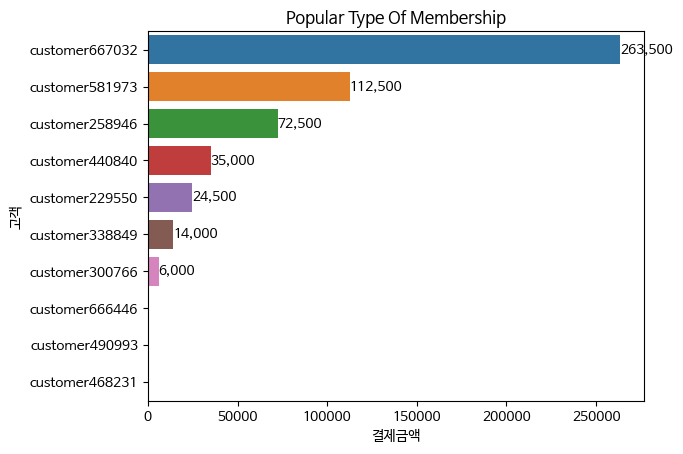

In [176]:
# 이용시간이 제인 긴 top 10 고객들의 결제금액 데이터를 시각화를 위해 customer1 변수에 할당 
customer1 = customer_time_payment.head(10)


# '고객'과 '결제금액'에 관한 막대그래프를 그리고자 결제금액을 기준으로 내림차순 정렬
customer1 = customer1.sort_values(by='결제금액', ascending = False)
customer1


# 막대그래프 시각화
ax = sns.barplot(data=customer1.reset_index(), x='결제금액', y='고객')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('Popular Type Of Membership')
# plt.xticks(rotation=45)
plt.show()

##### step 11_시각화 시도_상관계수_아직 구현하지 못함_많은 시도들..

In [ ]:
# 방법 1
# customer1.corr()
# customer1[['이용시간', '결제금액']].corr(method='pearson')


# 방법 2
# heatMap 그리기
# sns.heatmap(customer_sample.corr(), annot=True)
# plt.show()

# 방법 3
# customer_sample 데이터로 회귀선 그려보기
# sns.lmplot(data=customer1, x='이용시간', y='결제금액')
# plt.show()

# 방법 4
# customer_sample 데이터로 회귀선 그려보기
# sns.lmplot(data=customer1, x='이용시간', y='결제금액')
# plt.show() 
# -> TypeError: float() argument must be a string or a number, not 'Timedelta' 에러남

# 방법 5
# 필요한 컬럼만 남기기
# customer1 = customer1[['이용시간', '결제금액']]
# customer1

# 예시데이터
# data = pd.DataFrame({'timedelta': [np.timedelta64(i, 's') for i in range(10)],
#                      'value': np.random.randn(10)})
# data

# Pivot the data to create a matrix
# matrix = customer1.pivot(index='결제금액', columns='이용시간', values='결제금액')
# matrix

# Plot the heatmap
# sns.heatmap(matrix, cmap='coolwarm')

# Show the plot
# plt.show()


# 이용시간이 길다고 결제금액이 높을까?를 보여줄 수 있는 시각화

# 결론

### 분석 주제: 그동안 숨겨져 있던 모두카페의 진상 카공족은 누구일까? 

In [178]:
customer_time_payment.head(10)

,고객,이용시간,결제금액
0,customer440840,44 days 21:40:00,35000.0
1,customer667032,40 days 21:22:00,263500.0
2,customer229550,33 days 10:12:00,24500.0
3,customer666446,31 days 03:40:00,NaN
4,customer300766,29 days 03:44:00,6000.0
5,customer258946,24 days 12:07:00,72500.0
6,customer338849,22 days 22:46:00,14000.0
7,customer490993,20 days 03:34:00,NaN
8,customer581973,19 days 20:38:00,112500.0
9,customer468231,16 days 13:00:00,NaN


### 발견한 사실
1. 이용시간이 많은 고객은 이용권 금액 외 음식/음료 등 결제금액도 많을거라고 생각했는데 아니었다.
2. 누적 이용시간이 가장 많은 고객의 이용시간은 44일 21시간 40분인데 반하여 누적 결제금액은 35,000원이다.
3. 이용시간 상위 10명의 고객 중 음식/음료의 결제금액이 0원인 고객은 3명, 이외에 50,000원이 넘지 않는 고객은 4명이다.
4. 상위 10명의 고객 중 "7명"이 누적 결제금액이 50,000원 이하이다.

### 전략 제안
1. 이용시간 상위 10명의 고객은 모두카페에 자주 오거나 정기적으로 오는 고객들이다.
2. 이에 이 고객들이 머무는 시간 동안 카페 수익을 위해 음식/음료의 결제를 유도할 수 있는 방안을 생각할 필요가 있다.
3. VIP 고객이라고 할 수 있는 고객들이 음식/음료의 결제금액이 적다는 건, 자주 오지 않는 고객들의 음식/음료 구매율도 적을 것이라 유추해볼 수 있다.
4. 메뉴의 종류가 많은 걸 분석을 하며 발견했다. 메뉴의 종류를 줄이고, 판매를 촉진할 수 있는 메뉴 개발 및 선정이 필요할 것 같다.
5. 이용시간 상위 10명의 고객의 행동패턴을 더 분석할 필요가 있다. 이들이 모두카페에 자주 오는 원인과 카페에서의 행동 데이터들을 분석하여, 다른 고객들의 누적 이용시간이 길어지도록 하는 방법을 찾아야 한다. 

# 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    1. 금액 예 4,500에서 쉼표를 빼는 부분
    2. 고객들의 이용시간과 결제금액간의 상관관계를 살펴보고 시각화하려고 했는데 하지 못한 부분    
    이용시간 컬럼이 timedelta64로 되어있어 그런지 여러가지 방법도 시도해보고, 엑셀로 상위 10명의 데이터를 가지고 와 차트로 만들어보려고 했는데 하지 못했습니다.



- **해결을 위해 시도한 방법**  
     1. 조원들과 안 되는 부분에 대해 이야기 나누기
     2. 구글링 하기
     3. 노션 노드 정리해 놓은 부분 찾아가며 복습하기


- **문제해결에 성공한 이유 또는 실패한 이유**  
    조원들과 추가 분석 주제를 같이 정하고 시각화까지 할 수 있었던 점이 매우 뿌듯합니다.

    이렇게 할 수 있었던 이유는, 조별 프로젝트를 어떻게 진행할지 큰 흐름을 함께 잡았기 때문인 것 같습니다.
    
    처음 조가 편성되었을 때 
    1. 금요일에는 첫 번째 문제 각자 풀고 공유하며 같이 풀기
    2. 금요일 ~ 일요일까지 3문제를 풀고, 주말간 추가 분석 주제 고민해오기
    3. 차주 월요일에 3문제 코드 리뷰, 추가 분석 주제 오전에 선정 및 분석 진행
    4. 오후 5시에 발표이므로 오후 4시까지 마무리     
    
  이와 같이 흐름을 같이 잡고, 조원 모두가 그 흐름을 맞추려고 노력했기에(모두 월요일 아침에 문제를 풀어왔어요) 가능했던 것 같습니다.
    
  또 추가 분석 주제를 정할 때에도 각자 의견을 내고, 자신의 의견만 주장하기보다 더 재미있고 우리가 같이 할 수 있을 것 같은(제한된 시간내에) 주제를 같이 정하려고 노력하였습니다.
    
  끝으로 월요일에는 거의 하루종일 마이크를 키고 분석하며, 서로 필요한 게 있을 때 바로바로 소통하려고 하였습니다. 화면을 공유해 최종 코드도 함께 검토하며 작성하였는데 이런 점들이 조별프로젝트를 잘 마무리할 수 있었던 이유 같습니다.

### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**

<span style = "color:blue;">쉼표 공백으로 대체하기</span>    
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',','')


<span style = "color:blue;">temp_var의 payment열을 date 기준으로 집계할 때</span>    
grouped = temp_var['결제금액'].groupby(temp_var['date']).sum()      
처음에 count()를 해야한다고 생각했는데 sum()이었다.     
이것도 조원들과 이야기하며 바로잡음



<span style = "color:bluee;">Series를 데이터프레임으로 바꾸기</span>    
groupby 한 데이터는 Series 라는 것을 알게 됨(AttributeError: 'Series' object has no attribute 'info' 에러를 통해)    
그래서 Series를 데이터프레임으로 만드는 방법을 찾아보다 아래와 같이 해봄     
df = pd.DataFrame({'상품명': value_counts.index, '판매수량': value_counts.values})



<span style = "color:blue;">원본 데이터프레임에서 원하는 컬럼만 따로 데이터프레임 만들기</span>  
items_payment = temp_var[['상품명', '결제금액']]      
4-2 노드 보고 앎



<span style = "color:blue;">중복되는 데이터 빼주기</span>  
items_payment_1 = items_payment.drop_duplicates(subset=['상품명'])       
중복되는거 걸러주기, 판다스 공식문서 봄



<span style = "color:blue;">지예님이 알려주신 datetime64 데이터 타입</span> 



<span style = "color:blue;">성덕님이 알려주신 이용시간(예: 21일 15시간)을 시간 단위로만 바꾸는  방법</span>       
timedelta 데이터 타입을 float64로     
temp_var_1['이용시간'] = ( temp_var_1['퇴실'] - temp_var_1['입실'] ) / pd.Timedelta(hours=1)

- **아직 모호한 점**

<span style = "color:blue;">이용시간과 결제금액의 상관관계</span>   
둘의 상관관계를 알고 싶어 상관계수, 회귀선, 히트맵 등을 찾아봤는데 구현하지 못했습니다.     
왜 안 되었는지에 대한 이유를 몰라서 아직 더 공부가 필요한 것 같아요.

### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

이번 프로젝트는 조별로 진행된 부분이 인상적이었어요. 덕분에 조원들과 대화를 많이 할 수 있어 좋았습니다.    
또 발표를 하게 되었었는데, 학생들 앞에서 수업할 때에는 떨리지 않았던 것 같은데 이번에는 많이 떨렸어요.   
발표하기 전에 어느 정도 진정이 되서 얼마나 다행이었는지 몰라요.     
하고 나니 그 경험만으로도 배운게 컸습니다.    
다른 사람이 시간을 내서 내 이야기를 듣고 있는 것이니, 쉽게 이해할 수 있고 그들의 시간이 의미있도록 해야하는 몫이 있는 것 같아요.

## 참고한 레퍼런스

<span style = "color:gray;">판다스 데이터타입 바꿀 때 pandas.DataFrame.astype()</span>     
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype

    
<span style = "color:gray;">pd.to_datetime</span>       
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
    

<span style = "color:gray;">pd.dt.days</span>       
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.days.html
    

<span style = "color:gray;">set()</span>      
https://blog.naver.com/sweetiebobo/222744963953
https://blog.naver.com/kut_da_92/222693359726
    

<span style = "color:gray;">matplotlib에서 x축 눈금 레이블 회전시키기</span>      
https://www.delftstack.com/ko/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
    

<span style = "color:gray;">쉼표 빼기</span>     
https://blog.naver.com/playce/222880901395
    

<span style = "color:gray;">Seaborn.barplot</span>     
https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot
    

<span style = "color:gray;">pandas.abs()</span>      
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.abs.html#pandas.DataFrame.abs
    

<span style = "color:gray;">pandas.DataFrame.sort_values</span>      
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values
    

<span style = "color:gray;">엑셀 시간차이 구하기</span>     
https://nwairr.tistory.com/entry/Excel-%EC%8B%9C%EA%B0%84-%EC%B0%A8%EC%9D%B4-%EA%B5%AC%ED%95%98%EA%B8%B0
    

<span style = "color:gray;">판다스 중복된 행 제거</span>    
https://blog.naver.com/kiddwannabe/222141005974
    

<span style = "color:gray;">pandas groupby</span>       
https://blog.naver.com/midong00guri/222539075180

      
<span style = "color:gray;">pandas 중복된 행 제거</span>      
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html?highlight=drop_duplicates#pandas.DataFrame.drop_duplicates
    

<span style = "color:gray;">판다스 object 를 datetime 타입으로 변환</span>  
https://sequence-data.tistory.com/7


<span style = "color:gray;">데이터타입 변환 astype 함수</span>  
https://blog.naver.com/applewoods/222648404673


<span style = "color:gray;">판다스 공식문서 데이터 타입 변환 astype 함수</span>    
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
    

<span style = "color:gray;">Seaborn 공식문서 히트맵 그리기</span>    
https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap
    

<span style = "color:gray;">상관계수, 히트맵</span>    
https://blog.naver.com/mkk37/222039746654